# Appendix B: plotting diagnostics' Lines of Sight

You can plot diagnostics' LOS on top of the vessel by exporting coordinate files from diaggeom. In this example, we exported the LOS for the DCN as __DCN.coords__ and RIC as __RIC.coords__ and will use the `get_los_diaggeom` module to read the data.

In [1]:
from ipfnpytools.get_los_diaggeom import get_los
import matplotlib.pyplot as plt
from ipfnpytools.getVessel import getVessel
from ipfnpytools.plotVessel import plotVessel
from ipfnpytools.angle_from_los_pol import angle_from_los_pol
import numpy as np

In [2]:
dcn_los = get_los('./Files/DCN.coords')
ric_los = get_los('./Files/RIC.coords')
rfl_los = get_los('./Files/RFL.coords')

In [3]:
dcn_los.keys()

['signals', 'name', 'description']

In [4]:
ric_los.keys()

['signals', 'name', 'description']

In [5]:
ric_los['signals'].keys()

['Antenna 8', 'Antenna 1', 'Antenna 4']

In [6]:
vessel = getVessel(35174)

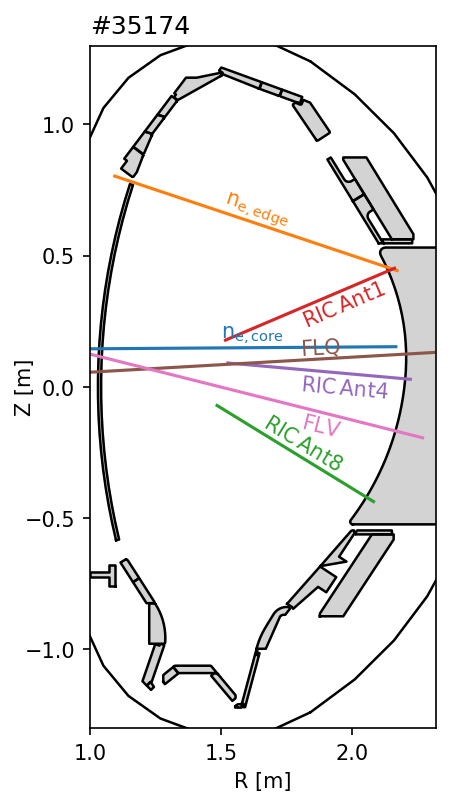

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,5.5), dpi=150)
plotVessel(vessel, ax)
ax.set_aspect('equal')
ax.set_ylabel('Z [m]', labelpad=-5)
ax.set_xlabel('R [m]')
ax.set_title('#35174', loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, 1.3)

#Plot the interferometers and jazz it up
ax.plot(dcn_los['signals']['H-1']['0']['R'], dcn_los['signals']['H-1']['0']['z'])

ax.text(1.5, dcn_los['signals']['H-1']['0']['z'][0]+0.04, r'$\mathrm{n_{e,core}}$', color='C0')

ax.plot(dcn_los['signals']['H-5']['0']['R'], dcn_los['signals']['H-5']['0']['z'])

ax.text(1.5, dcn_los['signals']['H-5']['0']['z'][0]-0.1, r'$\mathrm{n_{e,edge}}$',
        color='C1', rotation=angle_from_los_pol(dcn_los, 'H-5'))

#Plot RIC LOS

#Antenna 8
ax.plot(ric_los['signals']['Antenna 8']['0']['R'], ric_los['signals']['Antenna 8']['0']['z'])
ax.text(1.65, ric_los['signals']['Antenna 8']['0']['z'][0]+0.28, r'$\mathrm{RIC\,Ant8}$',
        color='C2', rotation=angle_from_los_pol(ric_los, 'Antenna 8'))

#Antenna 1
ax.plot(ric_los['signals']['Antenna 1']['0']['R'], ric_los['signals']['Antenna 1']['0']['z'])
ax.text(1.8, ric_los['signals']['Antenna 1']['0']['z'][0]-0.1, r'$\mathrm{RIC\,Ant1}$',
        color='C3', rotation=angle_from_los_pol(ric_los, 'Antenna 1'))

#Antenna 4
ax.plot(ric_los['signals']['Antenna 4']['0']['R'], ric_los['signals']['Antenna 4']['0']['z'])

ax.text(1.8, ric_los['signals']['Antenna 4']['0']['z'][0]-0.04, r'$\mathrm{RIC\,Ant4}$',
        color='C4', rotation=angle_from_los_pol(ric_los, 'Antenna 4'))

#RFL
ax.plot(rfl_los['signals']['FLQ']['0']['R'], rfl_los['signals']['FLQ']['0']['z'])
ax.text(1.8, rfl_los['signals']['FLQ']['0']['z'][0]-0.00, r'$\mathrm{FLQ}$',
        color='C5', rotation=angle_from_los_pol(rfl_los, 'FLQ'))

ax.plot(rfl_los['signals']['FLV']['0']['R'], rfl_los['signals']['FLV']['0']['z'])
ax.text(1.8, rfl_los['signals']['FLV']['0']['z'][0]+0.04, r'$\mathrm{FLV}$',
        color='C6', rotation=angle_from_los_pol(rfl_los, 'FLV'))


plt.tight_layout()
plt.show()